$ a \to aRbFR \\ b \to LFaLb $

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def expand_sequence(x):
    return x.upper().replace("A","aRbFR").replace("B","LFaLb")

def translate_sequence(x):
    i = (0+1j)
    mapping = {'R':-i,
               'L': i}
    return (mapping[y] for y in x if y in mapping)

def complex_walk(n):
    x = complex(0)
    v = complex(1)
    i = (0+1j)
    mapping = {'R':-i,
               'L': i}
    yield x
    for u in dragon_instructions(n):
        if u == 'F':
            x = x + v
            yield x
        elif u in mapping:
            v = v*mapping[u]
        else:
            continue

def dragon_instructions(n):
    if not n:
        return "Fa"
    else:
        return expand_sequence(dragon_instructions(n-1))
    
def plot_paths(XY, ax):
    A,B = XY.T
#     X,Y,U,V = [],[],[],[]
#     for i in range(len(XY)-1):
#         X.append(XY[i  ][0])
#         Y.append(XY[i  ][1])
#         U.append(XY[i+1][0])
#         V.append(XY[i+1][1])
#     X,Y,U,V = np.array(X),np.array(Y),np.array(U),np.array(V)
#     print("arrays: ",X,'\n',Y,'\n',U,'\n',V)
#     ax.quiver(X,Y,U,V, units = 'xy', scale = 1)
    ax.scatter(A,B)

In [39]:
expand_sequence(expand_sequence("Fa"))

'FaRbFRRLFaLbFR'

In [30]:
dragon_instructions(2)

'FaRbFRRLFaLbFR'

In [31]:
print(translate_sequence(dragon_instructions(3)))

<generator object translate_sequence.<locals>.<genexpr> at 0x00000271417910F8>


In [32]:
def dragon_walk(n):
    x = np.array([0,0])
    y = [x]
    v = np.array([1,0])
    R = np.array([[0, 1],[-1,0]])
    L = np.array([[0,-1],[ 1,0]])
    for i in dragon_instructions(n):
        if i == 'F':
            x = x + v
            y.append(x)
        elif i == 'R':
            v = R @ v
        elif i == 'L':
            v = L @ v
        else:
            continue
    return np.array(y)

def xdragon_walk(n):
    # generator
    x = np.array([0,0])
    v = np.array([1,0])
    R = np.array([[0, 1],[-1,0]])
    L = np.array([[0,-1],[ 1,0]])
    for i in dragon_instructions(n):
        if i == 'F':
            x = x + v
            yield x
        elif i == 'R':
            v = R @ v
        elif i == 'L':
            v = L @ v
        else:
            continue

In [26]:
def dragon_plot(n,ax):
    walk = dragon_walk(n)
    plot_paths(walk,ax)

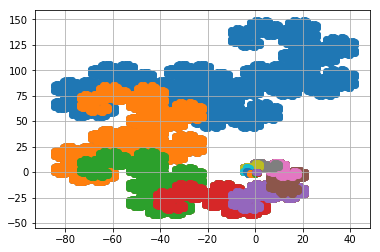

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in reversed(range(15)):
    dragon_plot(i,ax)
plt.grid()
plt.show()

In [56]:
%timeit tuple(xdragon_walk(10))

100 loops, best of 3: 6.64 ms per loop


In [57]:
%timeit tuple(complex_walk(10))

1000 loops, best of 3: 857 µs per loop
